In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats =np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs =zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import the request library
import requests

#Import the API key
from config import weather_api_key

#Import the datetime module from the datetime library
from datetime import datetime
from citipy import citipy 

In [5]:
# Create a list for holdimg the cities.
cities =[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, then we will ad it to the cities list.
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count.
len(cities)
    

594

In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8151fed7ab23e8b1e13bb9325a0f3b3


In [7]:
# Create an empty list to hold the weather data.
city_data =[]
#print the beginning of the logging
print("Begining Data Retrieval        ")
print("--------------------------------")

#Create counters
record_count = 1
set_count =1

#Loop through all the cities in our list
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50== 0 and i >=50):
        set_count +=1
        record_count =1
    # Create endpoint URL with each city
    city_url =url + "&q=" + "i"
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i >=50):
        set_count +=1
        record_count =1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count +=1 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    #Appnd the city information into city_data list.
        city_data.append({"city": city.title(),
                    "Country": city_country,
                    "Date": city_date,
                     "lat": city_lat,
                     "Lng":city_lng,
                     "Max Temp": city_max_temp,
                     "Humidity": city_humidity,
                     "Cloudiness": city_clouds,
                     "Wind Speed":city_wind})
    
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data loading is complete.
    print("-------------------------------")
    print("Data Retrieval Complete        ")
    print("-------------------------------")
    


Begining Data Retrieval        
--------------------------------
processing Record 1 of Set 12 | ushuaia
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 2 of Set 12 | bredasdorp
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 3 of Set 12 | minuri
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 4 of Set 12 | alice springs
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 5 of Set 12 | faanui
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 6 of Set 12 | taolanaro
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 7 of Set 12 | wamba
-------------------------------
Data Retriev

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 10 of Set 13 | arlit
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 11 of Set 13 | kruisfontein
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 12 of Set 13 | khatanga
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 13 of Set 13 | kone
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 14 of Set 13 | butaritari
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 15 of Set 13 | anadyr
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 16 of Set 13 | rio pardo
-------------------------------
Data

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 20 of Set 14 | richards bay
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 21 of Set 14 | huarmey
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 22 of Set 14 | arraial do cabo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 23 of Set 14 | ambilobe
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 24 of Set 14 | tessalit
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 25 of Set 14 | margate
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 26 of Set 14 | isangel
--------------------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 28 of Set 15 | sawtell
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 29 of Set 15 | kushmurun
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 30 of Set 15 | norman wells
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 31 of Set 15 | odweyne
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 32 of Set 15 | bathsheba
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 33 of Set 15 | guerrero negro
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 34 of Set 15 | bambous virieux
-----------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 37 of Set 16 | paramonga
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 38 of Set 16 | marabba
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 39 of Set 16 | vicksburg
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 40 of Set 16 | beyla
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 41 of Set 16 | hofn
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 42 of Set 16 | merauke
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 43 of Set 16 | opuwo
-------------------------------
Data Retriev

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 46 of Set 17 | krasnoselkup
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 47 of Set 17 | hobyo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 48 of Set 17 | daru
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 49 of Set 17 | kodiak
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 50 of Set 17 | iqaluit
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 1 of Set 18 | noumea
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 2 of Set 18 | awjilah
-------------------------------
Data Retrieva

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 6 of Set 19 | vestmannaeyjar
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 7 of Set 19 | oxford
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 8 of Set 19 | ozernovskiy
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 9 of Set 19 | constitucion
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 10 of Set 19 | wahpeton
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 11 of Set 19 | grand-santi
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 12 of Set 19 | yerbogachen
---------------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 16 of Set 20 | tombouctou
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 17 of Set 20 | lagoa da prata
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 18 of Set 20 | nueva concepcion
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 19 of Set 20 | longyearbyen
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 20 of Set 20 | kamloops
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 21 of Set 20 | kaniama
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 22 of Set 20 | prieska
----------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 27 of Set 21 | poum
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 28 of Set 21 | camacha
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 29 of Set 21 | wembley
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 30 of Set 21 | college
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 31 of Set 21 | sydney mines
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 32 of Set 21 | maine-soroa
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 33 of Set 21 | olafsvik
-------------------------------
Da

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 37 of Set 22 | svetlogorsk
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 38 of Set 22 | torrington
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 39 of Set 22 | tiquisio
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 40 of Set 22 | buala
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 41 of Set 22 | hwange
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 42 of Set 22 | floresta
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 43 of Set 22 | bud
-------------------------------
Data Re

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,city,Country,Date,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-10-06 11:45:32,-54.80,-68.30,37.40,73,75,11.41
1,Bredasdorp,ZA,2020-10-06 11:45:33,-34.53,20.04,69.80,56,73,6.93
2,Minuri,PH,2020-10-06 11:45:33,16.54,121.86,76.03,90,99,2.08
3,Alice Springs,AU,2020-10-06 11:42:01,-23.70,133.88,57.20,100,90,5.82
4,Faanui,PF,2020-10-06 11:45:34,-16.48,-151.75,77.45,80,1,13.42
5,Wamba,NG,2020-10-06 11:45:34,8.93,8.60,89.44,54,100,3.62
6,Ishigaki,JP,2020-10-06 11:45:35,24.34,124.16,77.00,69,40,14.99
7,Busselton,AU,2020-10-06 11:45:36,-33.65,115.33,54.00,49,59,6.93
8,Spremberg,DE,2020-10-06 11:45:36,51.57,14.37,59.00,78,96,7.00
9,Kastamonu,TR,2020-10-06 11:45:36,41.50,33.67,82.40,20,20,9.17


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into CSV

city_data_df.to_csv(output_data_file,index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module
import time
# Get today's date in seconds.
today = time.time()
today

1601985014.161303

In [14]:
today = time.strftime("%x")
today

'10/06/20'

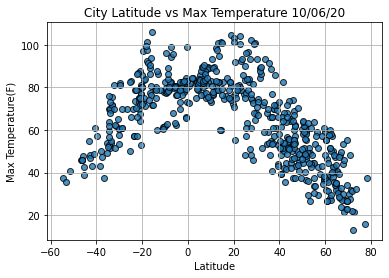

In [17]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

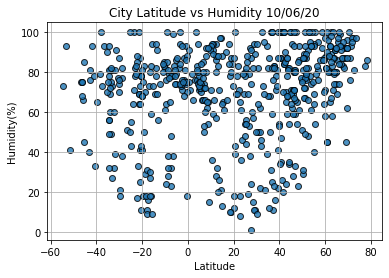

In [18]:
# Build the scatter plot for latitude vs Humidity.
plt.scatter(lats,
           humidity, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

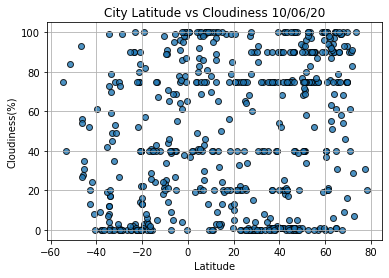

In [19]:
# Build the scatter plot for latitude vs Cloudiness.
plt.scatter(lats,
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

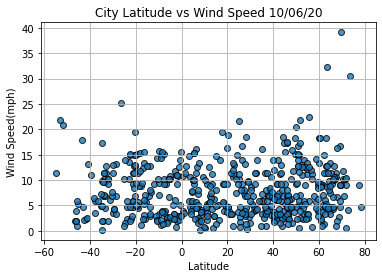

In [20]:
# Build the scatter plot for latitude vs Wind Speed.
plt.scatter(lats,
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()